In [1]:
# plan: map all front particle sensors to building types (Lucas LC)
# - map particle aquisition to gpx/gps data
# - statistically analyze for LC + building height?
# and perhaps to traffic data

In [2]:
# contour map
# identifying areas of bad/medium/good pollution

In [1]:
import os
import re
import geopandas as gpd

In [2]:
# for files in standardized_withoutNA
#   select Front data only  
#   vstack
#   map points to LC

df_list = []

for gpkg_file in os.listdir("./data/standardized_withNA"):
    df = gpd.read_file(os.path.join(os.getcwd(), "data/standardized_withNA", gpkg_file))
    df_filtered = df.filter(regex=r'air_particleFront|^distance_from_start_km|^geometry')
    df_list.append(df_filtered)
    # gpd.read_file("./data/standardized_withoutNA/Aufnahme_13062024_nachmittag_combined_standardized_withoutNA.gpkg")

In [3]:
df_list

[     distance_from_start_km  mean_Particles > 0.3um / 0.1L air_particleFront  \
 0                      0.00                                       621.529552   
 1                      0.05                                       803.400000   
 2                      0.10                                      1579.304348   
 3                      0.15                                       705.457823   
 4                      0.20                                       589.636997   
 ..                      ...                                              ...   
 661                   33.05                                              NaN   
 662                   33.10                                       651.660839   
 663                   33.15                                      1434.033027   
 664                   33.20                                       767.900000   
 665                   33.25                                       663.500000   
 
      mean_Particles > 0.5

In [4]:
import pandas as pd

In [5]:
stacked_gdf = pd.concat(df_list, ignore_index=True)

In [6]:
stacked_gdf = stacked_gdf.reset_index()

In [16]:
gpd.read_file("./data/de_cuyan/wuerzburg_Buildings.gpkg")

,element,id,name,geometry
0,node,664745957,None,POINT (9.91686 49.79138)
1,relation,7074,Residenz Würzburg,"POLYGON ((9.93883 49.79301, 9.93886 49.79307, ..."
2,relation,166012,Kilianeum,"POLYGON ((9.93633 49.78965, 9.93617 49.79016, ..."
3,relation,225641,None,"POLYGON ((9.93023 49.79769, 9.93023 49.79769, ..."
4,relation,901492,St.Burkardus-Haus,"POLYGON ((9.93217 49.79282, 9.93183 49.79282, ..."
...,...,...,...,...
2966,way,1367954511,Esso Snack & Shop,"POLYGON ((9.92098 49.80319, 9.921 49.80321, 9...."
2967,way,1408563703,None,"POLYGON ((9.93439 49.79391, 9.93473 49.79385, ..."
2968,way,1408563704,None,"POLYGON ((9.93502 49.79419, 9.93511 49.79418, ..."
2969,way,1408563705,None,"POLYGON ((9.93478 49.79398, 9.93484 49.79423, ..."


<Axes: >

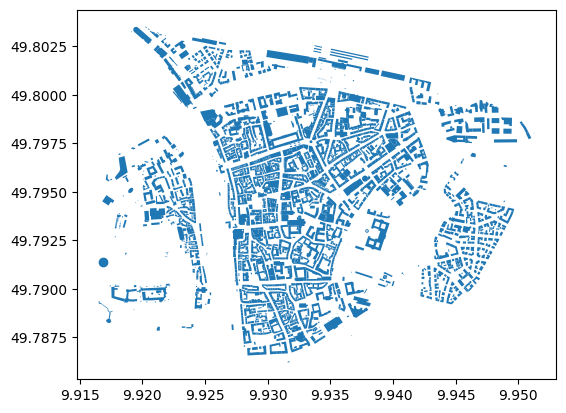

In [9]:
gpd.read_file("./data/de_cuyan/wuerzburg_Buildings.gpkg").plot()

<Axes: >

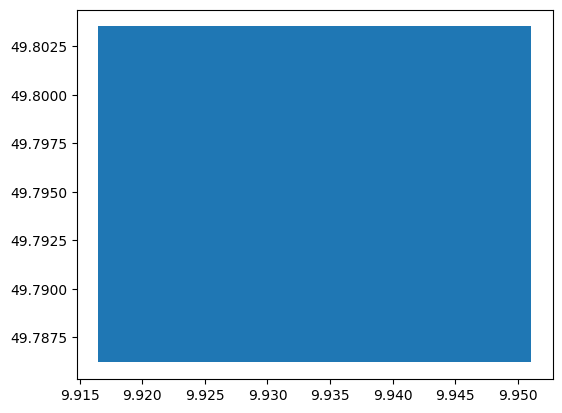

In [12]:
gpd.read_file("./data/de_cuyan/bounds_wu_4326.gpkg").plot()

# make contour of gas data

In [7]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

In [10]:


#df = pd.read_csv('./temperature_2d.csv')
x = np.array(df.lon)
y = np.array(df.lat)
z = np.array(df.value)
xi = np.linspace(x.min(), x.max(), 200)
yi = np.linspace(y.min(), y.max(), 200)

X,Y = np.meshgrid(xi,yi)
Z = griddata((x,y),z,(X,Y), method='cubic')

# Z_strich = griddata(stacked_gdf.geometry, values)

fig = go.Figure(data =
    go.Contour(
        z=Z,
        x=xi,
        y=yi,
        colorscale = 'Hot',
        contours_coloring='heatmap'
    )
)
fig.show()


AttributeError: 'GeoDataFrame' object has no attribute 'lon'

In [ ]:
gpd.con

In [14]:
val_col

'mean_Particles > 0.3um / 0.1L air_particleFront'

In [19]:
import plotly.express as px

In [21]:
wue_buildings = gpd.read_file("./data/de_cuyan/wuerzburg_Buildings.gpkg")[1:]
wue_buildings

,element,id,name,geometry
1,relation,7074,Residenz Würzburg,"POLYGON ((9.93883 49.79301, 9.93886 49.79307, ..."
2,relation,166012,Kilianeum,"POLYGON ((9.93633 49.78965, 9.93617 49.79016, ..."
3,relation,225641,None,"POLYGON ((9.93023 49.79769, 9.93023 49.79769, ..."
4,relation,901492,St.Burkardus-Haus,"POLYGON ((9.93217 49.79282, 9.93183 49.79282, ..."
5,relation,2230981,Kurie Neulobdeburg,"POLYGON ((9.93494 49.79297, 9.93469 49.79304, ..."
...,...,...,...,...
2966,way,1367954511,Esso Snack & Shop,"POLYGON ((9.92098 49.80319, 9.921 49.80321, 9...."
2967,way,1408563703,None,"POLYGON ((9.93439 49.79391, 9.93473 49.79385, ..."
2968,way,1408563704,None,"POLYGON ((9.93502 49.79419, 9.93511 49.79418, ..."
2969,way,1408563705,None,"POLYGON ((9.93478 49.79398, 9.93484 49.79423, ..."


In [ ]:
#wue_buildings_json = wue_buildings.to_json()

In [31]:
# Map all polygons in the geometry column
fig = px.choropleth(
    wue_buildings,
    geojson=wue_buildings.geometry, 
    locations = wue_buildings.index,
    #locations=wue_buildings.geometry,           # Use index or a specific column
    color="element", 
    #basemap_visible=True,
    #featureidkey="properties.id"   # Match this to your GDF index/column
)
fig.update_geos(fitbounds="locations", visible=False)

fig.show(renderer="browser")

In [33]:
# Load measurement points, interpolate and plot contour over Wuerzburg
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import plotly.graph_objects as go

# Try to use stacked_gdf if it exists (created earlier), otherwise read a sample combined gpkg
#try:
points = stacked_gdf.copy()
#except NameError:
#    # replace with a file that exists in your data/combined if needed
#    points = gpd.read_file("./data/combined/Aufnahme_13062024_Morgen_combined.gpkg")

# Find a sensible measurement column (common patterns used in this project)
meas_cols = [
    c
    for c in points.columns
    if "air_particleFront" in c or "particleFront" in c or "PM" in c or "particle" in c
]
if len(meas_cols) == 0:
    raise ValueError(
        "No particle measurement column found in points. Check column names: {}".format(
            list(points.columns)
        )
    )

val_col = meas_cols[0]
#override
val_col = 'mean_Particles > 1.0um / 0.1L air_particleFront'

# Prepare points: drop NA, project to metric CRS for interpolation (EPSG:3857)
points = points.dropna(subset=[val_col]).to_crs(epsg=3857)
points["x"] = points.geometry.x
points["y"] = points.geometry.y
x = points["x"].values
y = points["y"].values
z = points[val_col].values

xi = np.linspace(x.min(), x.max(), 300)
yi = np.linspace(y.min(), y.max(), 300)

X,Y = np.meshgrid(xi,yi)
Z = griddata((x,y), z, (X,Y), method="cubic")


fig = go.Figure()

#fig.add_trace(
#    go.
#)
fig = px.choropleth(
    wue_buildings,
    geojson=wue_buildings.geometry, 
    locations = wue_buildings.index,
    #locations=wue_buildings.geometry,           # Use index or a specific column
    color="element", 
    #basemap_visible=True,
    #featureidkey="properties.id"   # Match this to your GDF index/column
)
fig.update_geos(fitbounds="locations", visible=False)


# contour heatmap
fig.add_trace(
    go.Contour(
        z=Z,
        x=xi,
        y=yi,
        colorscale="Hot",
        contours_coloring="heatmap",
        opacity=0.85,
        name="contour",
    )
)

# measurement points colored by value
fig.add_trace(
    go.Scattergl(
        x=x,
        y=y,
        mode="markers",
        marker=dict(
            color=z,
            colorscale="Viridis",
            showscale=True,
            colorbar=dict(title=val_col),
            size=6,
        ),
        name="measurements",
    )
)

fig.update_layout(
    title="Wuerzburg particle contour ({})".format(val_col),
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    height=700,
    width=900,
)



fig.show(renderer="browser")

In [11]:
fig 